In [1]:
%matplotlib inline
from typing import List, Optional
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib.colors import ListedColormap, LinearSegmentedColormap, to_rgb
from colorsys import rgb_to_hls
from colorspacious import cspace_converter
import seaborn as sns
from ipywidgets import interact, fixed, IntSlider, FloatSlider, FloatLogSlider, Layout

# Choosing color palettes

This notebook is a Jupyter implementation of
"[Choosing color palettes](http://seaborn.pydata.org/tutorial/color_palettes.html)"(seaborn)
and also refers to 
"[Choosing Colormaps in Matplotlib](https://matplotlib.org/tutorials/colors/colormaps.html)".

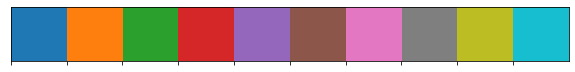

In [2]:
# Basic example
# If as_cmap is True, returns matplotlib.colors.Colormap
#     from seaborn 0.11.0 (Sep. 2020)
# desat = desaturate
sns.palplot(
    sns.color_palette(
        palette=None, n_colors=None, desat=None, as_cmap=False
    ), size=1
)

## Functions

In [3]:
color_palettes = {
    'qualitative': {
        'middle': ' '.join([
            'deep muted pastel bright dark colorblind',  # seaborn original
            'tab10 tab20 tab20b tab20c',  # matplotlib default
            'Paired Accent Set1 Pastel1 Set2 Dark2 Pastel2 Set3',
        ]),
    },
    'cyclic': {
        'middle': ' '.join([
            'hls husl',  # seaborn original
            'hsv twilight twilight_shifted',
        ]),
    },
    'sequential': {
        'darken': ' '.join([
            'Greys Reds Greens Blues Oranges Purples',  # 1 color
            'RdPu GnBu BuPu BuGn OrRd PuBu PuRd YlGn',  # 2 colors
            'PuBuGn YlGnBu YlOrBr YlOrRd',  # 3 colors
            'binary gist_yarg',  # binary
        ]),
        'lighten': ' '.join([
           'gray gist_gray bone pink',
        ]),
    },
    'perceptual uniform': {
        'lighen': ' '.join([
            'rocket magma inferno plasma',  # hot
            'cividis viridis mako',  # cool
        ]),
        'darken': ' '.join([
            'flare crest',
        ]),
    },
    'well defined': {
        'lighen': ' '.join([
            'cubehelix CMRmap gnuplot gnuplot2'  # colorful
        ]),
    },
    'diverging': {
        'middle': ' '.join([
            'PiYG PRGn BrBG PuOr RdGy RdBu',  # 2 colors
            'RdYlBu RdYlGn',  # 3 colors
            'coolwarm bwr seismic',  # blue and red
            'Spectral rainbow turbo',  # colorful
        ]),
    },
    'perceptual uniform diverging': {
        'middle': ' '.join([
            'vlag icefire',  # seaborn original
        ]),
    },
    'miscellaneous': {
        'lighten': ' '.join([
            'spring summer autumn winter',  # seasons
            'hot afmhot gist_heat copper',  # hot
            'brg nipy_spectral gist_ncar gist_rainbow',  # colorful
            'terrain gist_stern gist_earth ocean',  # nature color
        ]),
        'darken': ' '.join([
            'cool Wistia',
        ]),
        'middle': ' '.join([
            'flag prism',
        ]),
    },
    # "jet" !!
}


def get_palettes(palette_category: str) -> List[str]:
    palettes = list()
    for palette_names in color_palettes[palette_category].values():
        palettes.extend(palette_names.split(' '))
    return palettes

In [4]:
def convert_to_cmap(palette: str) -> ListedColormap:
    cmap = sns.color_palette(
        palette=palette, as_cmap=True
    )
    if cmap.__class__.__name__ == 'list':
        cmap = LinearSegmentedColormap.from_list(
            name=palette, N=len(cmap),
            colors=[
                to_rgb(x) for x in cmap
            ]
        )
    return cmap

In [5]:
def draw_color_palettes(
    palette_category: str
) -> None:
    palettes = get_palettes(palette_category)
    fig, axes = plt.subplots(
        nrows=len(palettes), figsize=(6.4, len(palettes) * 0.4)
    )
    fig.subplots_adjust(top=0.95, bottom=0.01, left=0.2, right=0.99)
    gradient = np.linspace(0, 1, 256)
    gradient = np.vstack((gradient, gradient))
    if axes.__class__.__name__ != 'ndarray':
        axes = np.array([axes])
    for ax, palette in zip(axes, palettes):
        cmap = convert_to_cmap(palette=palette)
        ax.imshow(gradient, aspect='auto', cmap=cmap)
        ax.set_axis_off()
        pos = list(ax.get_position().bounds)
        x_text = pos[0] - 0.01
        y_text = pos[1] + pos[3]/2.
        fig.text(x_text, y_text, palette, va='center', ha='right', fontsize=14)
    plt.show()
    return

In [6]:
def draw_each_color_palette(
    figure_type: str,
    palette: str,
    reverse: bool,
    n_colors: Optional[int],
    desaturation: Optional[float] = 1.0
) -> None:
    if figure_type == 'qualitative':
        if reverse:
            palette += '_r'
        pal = sns.color_palette(
            palette=palette, n_colors=n_colors, desat=desaturation, as_cmap=False
        )
        cmap = ListedColormap(list(pal))
        fig, ax = plt.subplots(1, 1, figsize=(n_colors, 1))
        ax.imshow(
            np.arange(n_colors).reshape(1, n_colors),
            cmap=cmap, interpolation='nearest', aspect='auto'
        )
        ax.set_xticks(np.arange(n_colors))
        ax.set_yticks([])
        ax.set_xticklabels([str(i) for i in range(n_colors)])
        ax.yaxis.set_major_locator(ticker.NullLocator())
        plt.show()
    elif figure_type == 'sequential':
        cmap = convert_to_cmap(palette=palette)
        gradient = np.linspace(0, 1, 256)
        gradient = np.vstack((gradient, gradient))
        fig, ax = plt.subplots(1, 1, figsize=(10, 1))
        ax.imshow(
            gradient, cmap=cmap, interpolation='nearest', aspect='auto'
        )
        ax.set_axis_off()
        plt.show()
    elif figure_type == 'lightness':
        fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
        x_ = np.linspace(0.0, 1.0, 100)
        cmap = convert_to_cmap(palette=palette)
        rgb = cmap(x_)[np.newaxis, :, :3]
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        y_ = lab[0, :, 0]
        c_ = x_
        ax.scatter(x_, y_, c=c_, cmap=cmap, s=100, linewidths=0.0)
        ax.set_ylim(0.0, 100.0)
        ax.set_xticks([])
        plt.show()
    else:  # figure_type == 'hue'
        ax = plt.subplot(111, projection='polar')
        x_ = np.linspace(0.0, 1.0, 100)
        cmap = convert_to_cmap(palette=palette)
        rgb = cmap(x_)[np.newaxis, :, :3]
        hls = np.array([rgb_to_hls(*x) for x in rgb[0]])
        h_ = hls[:, 0] * 2 * np.pi
        s_ = hls[:, 2]
        c_ = x_
        ax.scatter(h_, s_, c=c_, cmap=cmap, s=100, linewidths=0.0)
        ax.set_rlim([0.0, 1.05])
        ax.set_rgrids([])
        tickpos = np.linspace(0, 2 * np.pi, 4, endpoint=False)
        ax.set_xticks(tickpos)
        plt.show()
    return

In [7]:
def draw_hue_color_palette(
    figure_type: str,
    palette: str,
    n_colors: Optional[int],
    first_hue: Optional[float],
    lightness: Optional[float],
    saturation: Optional[float]
) -> None:
    if figure_type == 'qualitative':
        pal = eval(f'sns.{palette}_palette')(
            n_colors=n_colors, h=first_hue, l=lightness, s=saturation, as_cmap=False
        )
        fig, ax = plt.subplots(1, 1, figsize=(n_colors, 1))
        ax.imshow(
            np.arange(n_colors).reshape(1, n_colors),
            cmap=ListedColormap(list(pal)),
            interpolation='nearest', aspect='auto'
        )
        ax.set_xticks(np.arange(n_colors))
        ax.set_yticks([])
        ax.set_xticklabels([str(i) for i in range(n_colors)])
        ax.yaxis.set_major_locator(ticker.NullLocator())
        plt.show()
    elif figure_type == 'sequential':
        cmap = eval(f'sns.{palette}_palette')(
            n_colors=None, h=first_hue, l=lightness, s=saturation, as_cmap=True
        )
        gradient = np.linspace(0, 1, 256)
        gradient = np.vstack((gradient, gradient))
        fig, ax = plt.subplots(1, 1, figsize=(10, 1))
        ax.imshow(
            gradient, cmap=cmap, interpolation='nearest', aspect='auto'
        )
        ax.set_axis_off()
        plt.show()
    elif figure_type == 'lightness':
        fig, ax = plt.subplots(1, 1, figsize=(4.5, 4.5))
        x_ = np.linspace(0.0, 1.0, 100)
        cmap = eval(f'sns.{palette}_palette')(
            n_colors=n_colors, h=first_hue, l=lightness, s=saturation, as_cmap=True
        )
        rgb = cmap(x_)[np.newaxis, :, :3]
        lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
        y_ = lab[0, :, 0]
        c_ = x_
        ax.scatter(x_, y_, c=c_, cmap=cmap, s=100, linewidths=0.0)
        ax.set_ylim(0.0, 100.0)
        ax.set_xticks([])
        plt.show()
    else:  # figure_type == 'hue'
        ax = plt.subplot(111, projection='polar')
        x_ = np.linspace(0.0, 1.0, 100)
        cmap = eval(f'sns.{palette}_palette')(
            n_colors=n_colors, h=first_hue, l=lightness, s=saturation, as_cmap=True
        )
        rgb = cmap(x_)[np.newaxis, :, :3]
        hls = np.array([rgb_to_hls(*x) for x in rgb[0]])
        h_ = hls[:, 0] * 2 * np.pi
        s_ = hls[:, 2]
        c_ = x_
        ax.scatter(h_, s_, c=c_, cmap=cmap, s=100, linewidths=0.0)
        ax.set_rlim([0.0, 1.05])
        ax.set_rgrids([])
        ax.set_thetalim([0, 2 * np.pi])
        tickpos = np.linspace(0, 2 * np.pi, 4, endpoint=False)
        ax.set_xticks(tickpos)
        plt.show()
    return

In [8]:
def draw_cubehelix_color_palette(
    reverse: bool,
    n_colors: Optional[int],
    start_hue: Optional[float],
    n_rotations: Optional[float],
    gamma: Optional[float],
    hue: Optional[float],
    lightest: Optional[float],
    darkest: Optional[float]
) -> None:
    pal = sns.cubehelix_palette(
        n_colors=n_colors, start=start_hue, rot=n_rotations,
        gamma=gamma, hue=hue, light=lightest, dark=darkest,
        reverse=reverse, as_cmap=False
    )
    fig, ax = plt.subplots(1, 1, figsize=(n_colors, 1))
    ax.imshow(
        np.arange(n_colors).reshape(1, n_colors),
        cmap=ListedColormap(list(pal)),
        interpolation='nearest', aspect='auto'
    )
    ax.set_xticks(np.arange(n_colors))
    ax.set_yticks([])
    ax.set_xticklabels([str(i) for i in range(n_colors)])
    ax.yaxis.set_major_locator(ticker.NullLocator())
    plt.show()
    return

In [9]:
widget_style = {'description_width': 'initial'}
slide_layout = Layout(width='65%')

## Qualitative Color Palettes

Use for representing categorical data

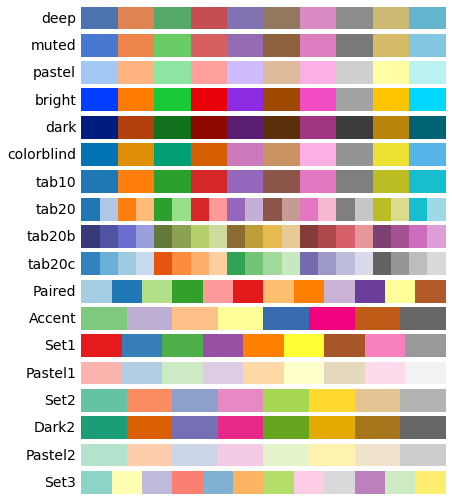

In [10]:
draw_color_palettes(palette_category='qualitative')

### Check Qualitative Color Palette interactively

In [11]:
_ = interact(
    draw_each_color_palette,
    figure_type=['qualitative', 'lightness', 'hue'],
    palette=get_palettes(palette_category='qualitative'),
    reverse=fixed(False),
    n_colors=IntSlider(
        min=1, max=48, step=1, value=10,
        layout=slide_layout, style=widget_style,
        description='n_colors (*)'
    ),
    desaturation=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=1.0,
        layout=slide_layout, style=widget_style,
        description='desarutation (*)'
    )
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'lightness', 'hue'), value='…

`(*)` Only works when figure\_type == `qualitative`. 

## Cyclic Color Palettes

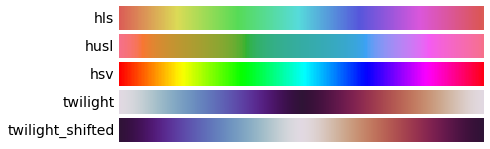

In [12]:
draw_color_palettes(palette_category='cyclic')

### Check Cyclic Color Palette interactively

In [13]:
_ = interact(
    draw_each_color_palette,
    figure_type=['qualitative', 'sequential', 'lightness', 'hue'],
    palette=get_palettes(palette_category='cyclic'),
    reverse=fixed(False),
    n_colors=IntSlider(
        min=1, max=48, step=1, value=10,
        layout=slide_layout, style=widget_style,
        description='n_colors (*)'
    ),
    desaturation=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=1.0,
        layout=slide_layout, style=widget_style,
        description='desaturation (*)'
    )
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

`(*)` Only works when figure\_type == `qualitative`. 

### Cusomize Cyclic Color Palette

In [14]:
_ = interact(
    draw_hue_color_palette,
    figure_type=['qualitative', 'sequential', 'lightness', 'hue'],
    palette=['hls', 'husl'],
    n_colors=IntSlider(
        min=1, max=48, step=1, value=10,
        layout=slide_layout, style=widget_style,
        description='n_colors (*)'
    ),
    first_hue=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=0.01,
        layout=slide_layout, style=widget_style
    ),
    lightness=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=0.6,
        layout=slide_layout, style=widget_style
    ),
    saturation=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=0.65,
        layout=slide_layout, style=widget_style
    )
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

`(*)` Only works when figure\_type == `qualitative`. 

## Sequential Color Palettes

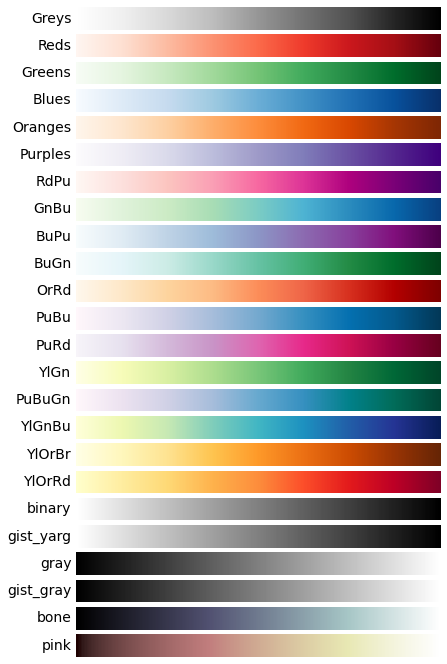

In [15]:
draw_color_palettes(palette_category='sequential')

### Check Sequential Color Palette interactively

In [16]:
_ = interact(
    draw_each_color_palette,
    figure_type=['qualitative', 'sequential', 'lightness', 'hue'],
    palette=get_palettes(palette_category='sequential'),
    reverse=False,
    n_colors=IntSlider(
        min=1, max=48, step=1, value=10,
        layout=slide_layout, style=widget_style,
        description='n_colors (*)'
    ),
    desaturation=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=1.0,
        layout=slide_layout, style=widget_style,
        description='desaturation (*)'
    )
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

`(*)` Only works when figure\_type == `qualitative`. 

## Perceptually Uniform Color Palettes

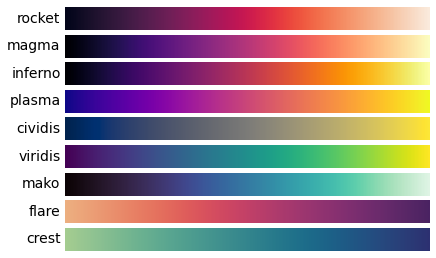

In [17]:
draw_color_palettes(palette_category='perceptual uniform')

### Check Perceptual Uniform Color Palette interactively

In [18]:
_ = interact(
    draw_each_color_palette,
    figure_type=['qualitative', 'sequential', 'lightness', 'hue'],
    palette=get_palettes('perceptual uniform'),
    reverse=False,
    n_colors=IntSlider(
        min=1, max=48, step=1, value=10,
        layout=slide_layout, style=widget_style,
        description="n_colors (*)"
    ),
    desaturation=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=1.0,
        layout=slide_layout, style=widget_style,
        description='desaturation (*)'
    )
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

`(*)` Only works when figure\_type == `qualitative`. 

## Well Defined Color Palettes

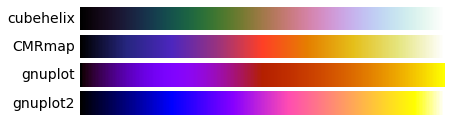

In [19]:
draw_color_palettes(palette_category='well defined')

### Check Well Defined Color Palette interactively

In [20]:
_ = interact(
    draw_each_color_palette,
    figure_type=['qualitative', 'sequential', 'lightness', 'hue'],
    palette=get_palettes(palette_category='well defined'),
    reverse=False,
    n_colors=IntSlider(
        min=1, max=48, step=1, value=10,
        layout=slide_layout, style=widget_style,
        description='n_colors (*)'
    ),
    desaturation=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=1.0,
        layout=slide_layout, style=widget_style,
        description='desaturation (*)'
    )
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

`(*)` Only works when figure\_type == `qualitative`. 

### Customize Cubehelix Color Palette

In [21]:
_ = interact(
    draw_cubehelix_color_palette,
    reverse=False,
    n_colors=IntSlider(
        min=1, max=48, step=1, value=10,
        layout=slide_layout, style=widget_style
    ),
    start_hue=FloatSlider(
        min=0.0, max=3.0, step=0.01, value=0.0,
        layout=slide_layout, style=widget_style
    ),
    n_rotations=FloatSlider(
        min=-1.0, max=1.0, step=0.01, value=0.4,
        layout=slide_layout, style=widget_style
    ),
    gamma=FloatSlider(
        min=0.0, max=20.0, step=0.1, value=1.0,
        layout=slide_layout, style=widget_style
    ),
    hue=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=0.8,
        layout=slide_layout, style=widget_style
    ),
    lightest=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=0.85,
        layout=slide_layout, style=widget_style
    ),
    darkest=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=0.15,
        layout=slide_layout, style=widget_style
    )
)

interactive(children=(Checkbox(value=False, description='reverse'), IntSlider(value=10, description='n_colors'…

## Diverging Color Palettes

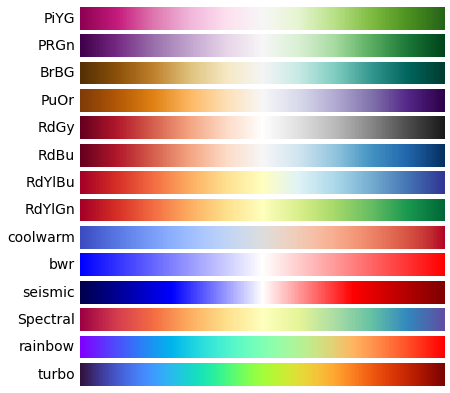

In [22]:
draw_color_palettes(palette_category='diverging')

### Check Diverging Color Palette interactively

In [23]:
_ = interact(
    draw_each_color_palette,
    figure_type=['qualitative', 'sequential', 'lightness', 'hue'],
    palette=get_palettes(palette_category='diverging'),
    reverse=False,
    n_colors=IntSlider(
        min=1, max=48, step=1, value=10,
        layout=slide_layout, style=widget_style,
        description='n_colors (*)'
    ),
    desaturation=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=1.0,
        layout=slide_layout, style=widget_style,
        description='desaturation (*)'
    )
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

`(*)` Only works when figure\_type == `qualitative`. 

## Perceptual Uniform Diverging Color Palettes

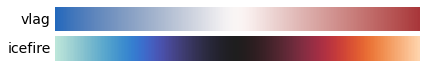

In [24]:
draw_color_palettes(palette_category='perceptual uniform diverging')

### Check Perceptual Uniform Diverging Color Palette interactively

In [25]:
_ = interact(
    draw_each_color_palette,
    figure_type=['qualitative', 'sequential', 'lightness', 'hue'],
    palette=get_palettes(palette_category='perceptual uniform diverging'),
    reverse=False,
    n_colors=IntSlider(
        min=1, max=48, step=1, value=10,
        layout=slide_layout, style=widget_style,
        description='n_colors (*)'
    ),
    desaturation=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=1.0,
        layout=slide_layout, style=widget_style,
        description='desaturation (*)'
    )
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

`(*)` Only works when figure\_type == `qualitative`. 

## Miscellaneous Color Pallets

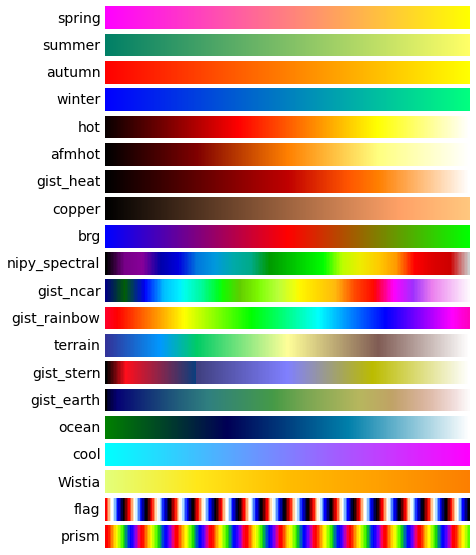

In [26]:
draw_color_palettes(palette_category='miscellaneous')

### Check Miscellaneous Color Palette interactively

In [27]:
_ = interact(
    draw_each_color_palette,
    figure_type=['qualitative', 'sequential', 'lightness', 'hue'],
    palette=get_palettes(palette_category='miscellaneous'),
    reverse=False,
    n_colors=IntSlider(
        min=1, max=48, step=1, value=10,
        layout=slide_layout, style=widget_style,
        description='n_colors (*)'
    ),
    desaturation=FloatSlider(
        min=0.0, max=1.0, step=0.01, value=1.0,
        layout=slide_layout, style=widget_style,
        description='desaturation (*)'
    )
)

interactive(children=(Dropdown(description='figure_type', options=('qualitative', 'sequential', 'lightness', '…

`(*)` Only works when figure\_type == `qualitative`. 

# Lightness of Color palettes

In [28]:
def draw_lightness():
    x = np.linspace(0.0, 1.0, 100)
    NPAL = {
        'qualitative': 6,
        'cyclic': 5,
        'sequential': 6,
        'perceptual uniform': 4,
        'diverging': 4,
        'perceptual uniform diverging': 4,
        'well defined': 4,
        'miscellaneous': 4,
    }
    _DC = {}
    for palette_category, palette_group in color_palettes.items():
        npal = NPAL.get(palette_category, 6)
        for palette_type, palette_names in palette_group.items():
            palette_list = palette_names.split(' ')
            nsubplots = int(np.ceil(len(palette_list) / npal))
            fig, axes = plt.subplots(
                nrows=nsubplots, squeeze=False, figsize=(8, 2.6 * nsubplots)
            )
            for i, ax in enumerate(axes.flat):
                locs = []  # locations for text labels
                for j, palette in enumerate(palette_list[i * npal: (i + 1) * npal]):
                    cmap = convert_to_cmap(palette=palette)
                    rgb = cmap(x)[np.newaxis, :, :3]
                    lab = cspace_converter("sRGB1", "CAM02-UCS")(rgb)
                    if palette_type == 'darken':
                        # These colormaps all start at high lightness but we want them
                        # reversed to look nice in the plot, so reverse the order.
                        y_ = lab[0, ::-1, 0]
                        c_ = x[::-1]
                    else:
                        y_ = lab[0, :, 0]
                        c_ = x
                    # cmaps horizontal spacing
                    dc = _DC.get(palette_category, 1.4)
                    ax.scatter(x + j * dc, y_, c=c_, cmap=cmap, s=100, linewidths=0.0)
                    if palette_type == 'middle':
                        locs.append(x[int(x.size / 2.0)] + j * dc)
                    else:
                        locs.append(x[-1] + j * dc)
                ax.set_xlim(0, dc * npal)
                ax.set_ylim(0, 100)
                ax.xaxis.set_ticks_position('top')
                tick = ticker.FixedLocator(locs)
                ax.xaxis.set_major_locator(tick)
                formatter = ticker.FixedFormatter(palette_list[i * npal: (i + 1) * npal])
                ax.xaxis.set_major_formatter(formatter)
                ax.xaxis.set_tick_params(rotation=50)
                ax.set_ylabel('Lightness $L^*$', fontsize=12)
            if palette_type == 'middle':
                palette_title = f'{palette_category} color palettes'
            else:
                palette_title = f'{palette_category} ({palette_type}) color palettes'
            axes.flat[0].set_title(palette_title, fontsize=16)
            fig.tight_layout(h_pad=0.0, pad=1.5)
            plt.show()

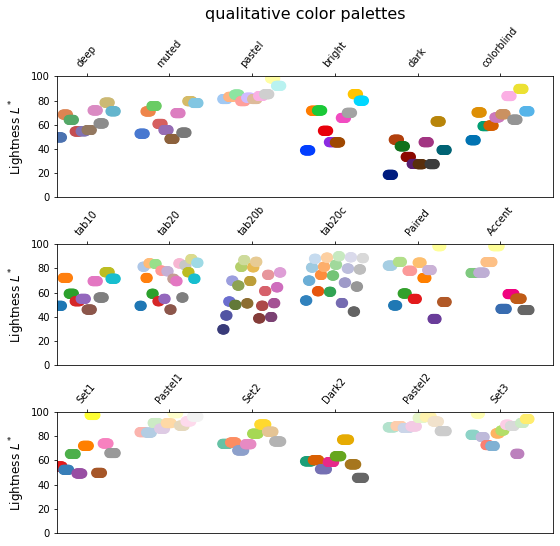

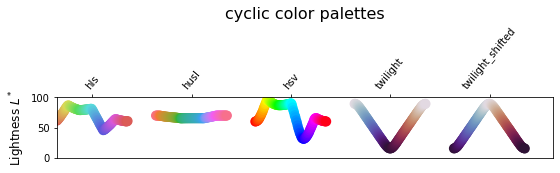

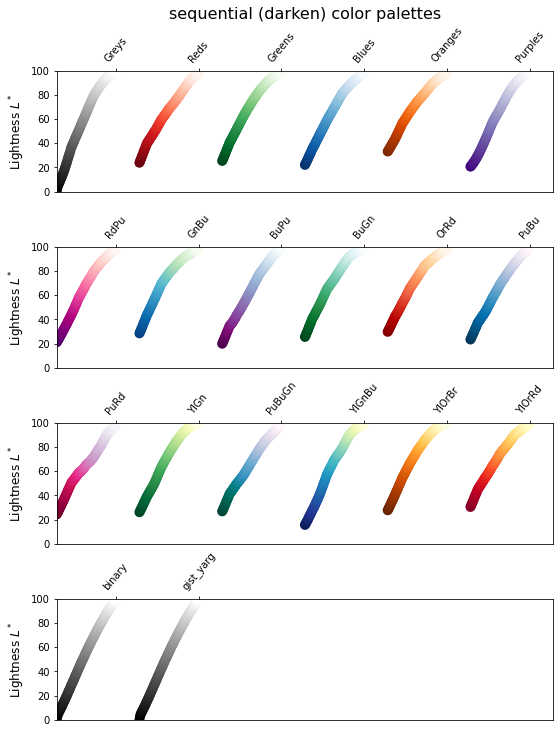

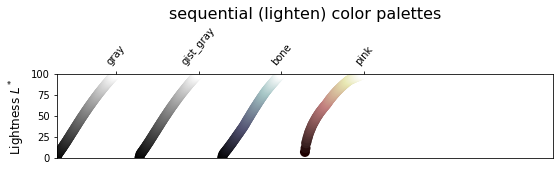

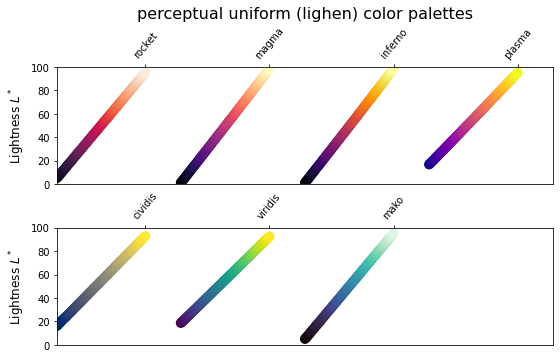

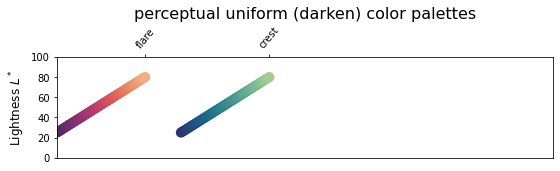

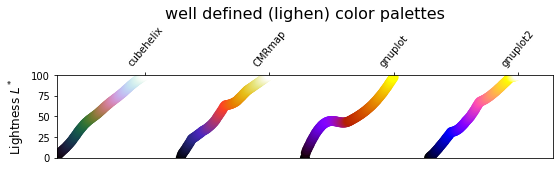

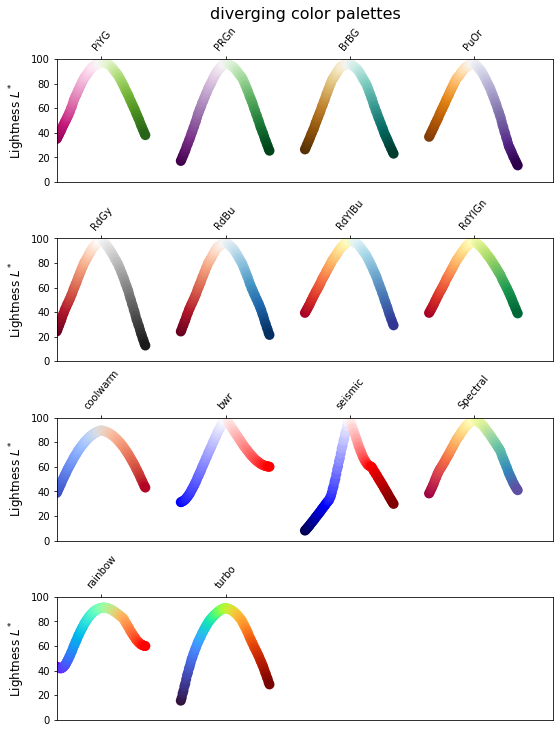

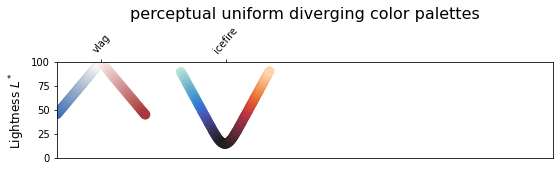

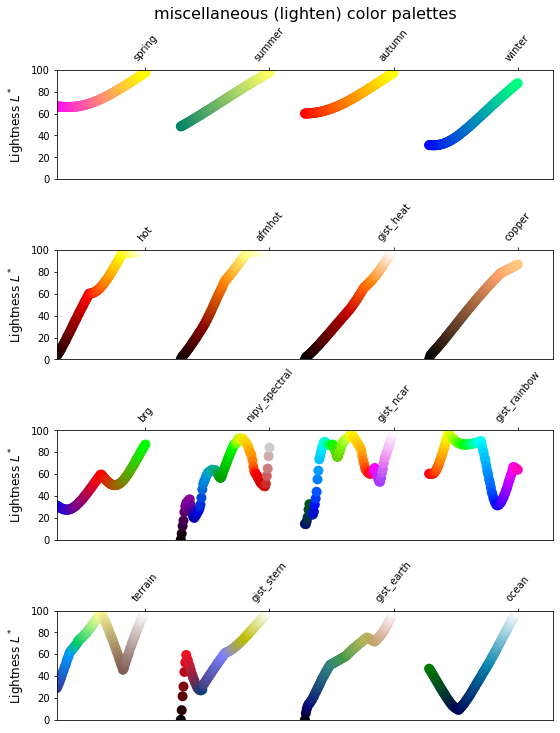

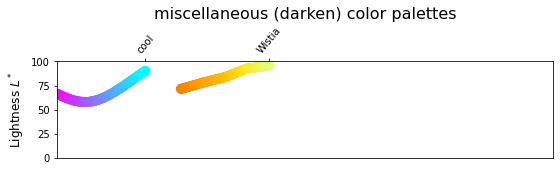

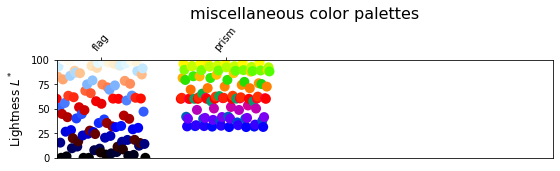

In [29]:
draw_lightness()

In [30]:
def show_pal3(light_or_dark, color, reverse):
    sns.palplot(eval('sns.%s_palette' % light_or_dark)(
        color=color, n_colors=10, reverse=reverse
    ))
interact(
    show_pal3,
    light_or_dark=['light', 'dark'],
    color=['blue', 'navy', 'green', 'palegreen', 'red'],
    reverse=False
);

interactive(children=(Dropdown(description='light_or_dark', options=('light', 'dark'), value='light'), Dropdow…

In [31]:
def show_pal4(h_neg, h_pos, s, l, center):
    sns.palplot(
        sns.diverging_palette(
            h_neg, h_pos, n=10, s=s, l=l, center=center
        )
    )
interact(
    show_pal4,
    h_neg=FloatSlider(220, max=360),
    h_pos=FloatSlider(20, max=360), 
    s=FloatSlider(75, max=99),
    l=FloatSlider(50, max=99),
    center=['light', 'dark']
);

interactive(children=(FloatSlider(value=220.0, description='h_neg', max=360.0), FloatSlider(value=20.0, descri…